In [1]:
import json
import pandas as pd
import os

os.chdir(r"C:\Users\swati nain\Prompt_Engineering_Task")
print("📂 Current Directory:", os.getcwd())


📂 Current Directory: C:\Users\swati nain\Prompt_Engineering_Task


In [3]:
data = {
    "Chapters": [
        {
            "chapter_id": "1",
            "chapter_name": "Crop Production and Management",
            "topics": [
                {
                    "topic_id": "1.1",
                    "topic_name": "Agricultural Practices",
                    "subtopics": [
                        {
                            "subtopic_id": "1.1.1",
                            "subtopic_name": "Preparation of Soil",
                            "content": {
                                "paragraphs": ["Soil is prepared before sowing the seeds."],
                                "activities": ["Demonstrate soil ploughing."],
                                "examples": ["Example of soil preparation in Punjab."],
                                "questions": ["Why is soil preparation important?"],
                                "tables": [],
                                "diagrams": [],
                                "external_sources": []
                            }
                        }
                    ]
                }
            ]
        }
    ]
}

with open("chapter-extract.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4)

print("✅ JSON saved as chapter-extract.json")


✅ JSON saved as chapter-extract.json


In [5]:
rows = []
for ch in data["Chapters"]:
    for topic in ch["topics"]:
        for sub in topic["subtopics"]:
            rows.append({
                "Chapter": ch["chapter_name"],
                "Topic": topic["topic_name"],
                "Subtopic": sub["subtopic_name"],
                "Paragraphs": " | ".join(sub["content"]["paragraphs"]),
                "Activities": " | ".join(sub["content"]["activities"]),
                "Questions": " | ".join(sub["content"]["questions"]),
            })

df = pd.DataFrame(rows)
df.to_excel("Science-output.xlsx", index=False)
print("✅ Excel saved as Science-output.xlsx")


✅ Excel saved as Science-output.xlsx


In [7]:
number_of_days = 5
planner = {"Planner": {"total_days": number_of_days, "daily_schedule": []}}

topics = [(ch["chapter_name"], t["topic_name"], s["subtopic_name"])
          for ch in data["Chapters"] for t in ch["topics"] for s in t["subtopics"]]

topics_per_day = max(1, len(topics) // number_of_days)

day = 1
for i in range(0, len(topics), topics_per_day):
    chunk = topics[i:i+topics_per_day]
    planner["Planner"]["daily_schedule"].append({
        "day": day,
        "topics_covered": [{"chapter_name": c, "topic": t, "subtopics": [s]} for c, t, s in chunk],
        "estimated_duration_hours": "2",
        "activities": ["Revise key points", "Solve questions"],
        "revision_notes": "Review diagrams and definitions."
    })
    day += 1

with open("study_planner.txt", "w", encoding="utf-8") as f:
    f.write(json.dumps(planner, indent=4))

print("✅ Study Planner saved as study_planner.txt")


✅ Study Planner saved as study_planner.txt


In [9]:
try:
    from reportlab.lib.pagesizes import letter
    from reportlab.pdfgen import canvas

    def txt_to_pdf(txt_file, pdf_file):
        c = canvas.Canvas(pdf_file, pagesize=letter)
        width, height = letter
        with open(txt_file, "r", encoding="utf-8") as f:
            lines = f.readlines()
        y = height - 40
        for line in lines:
            c.drawString(40, y, line.strip())
            y -= 15
            if y < 40:
                c.showPage()
                y = height - 40
        c.save()

    txt_to_pdf("study_planner.txt", "study_planner.pdf")
    print("✅ Study Planner PDF saved as study_planner.pdf")
except ImportError:
    print("⚠️ ReportLab not installed. Run: pip install reportlab")


✅ Study Planner PDF saved as study_planner.pdf


In [11]:
# 🔹 Text Knowledge Graph
with open("knowledge_graph.txt", "w", encoding="utf-8") as f:
    for ch in data["Chapters"]:
        f.write(f"Chapter: {ch['chapter_name']}\n")
        for t in ch["topics"]:
            f.write(f"  └─ Topic: {t['topic_name']}\n")
            for s in t["subtopics"]:
                f.write(f"      └─ Subtopic: {s['subtopic_name']}\n")
        f.write("\n")

print("✅ Text Knowledge Graph saved as knowledge_graph.txt")


✅ Text Knowledge Graph saved as knowledge_graph.txt


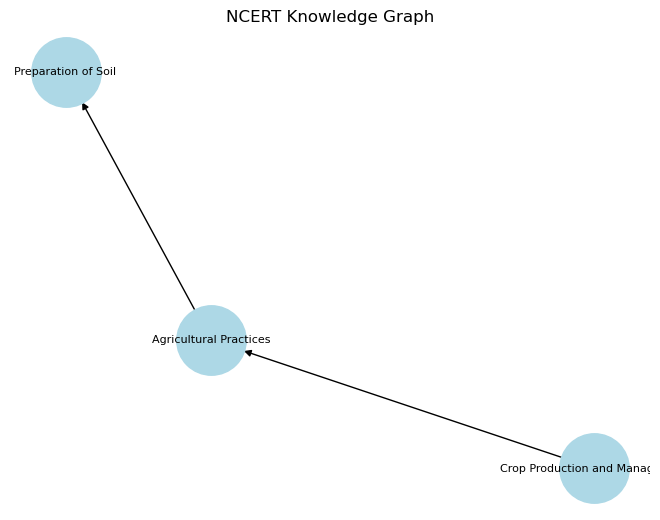

✅ Knowledge Graph Diagram saved as knowledge_graph.png


In [13]:
try:
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()
    for ch in data["Chapters"]:
        G.add_node(ch["chapter_name"])
        for t in ch["topics"]:
            G.add_edge(ch["chapter_name"], t["topic_name"])
            for s in t["subtopics"]:
                G.add_edge(t["topic_name"], s["subtopic_name"])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2500, font_size=8, arrows=True)
    plt.title("NCERT Knowledge Graph")
    plt.savefig("knowledge_graph.png", dpi=300, bbox_inches="tight")
    plt.show()

    print("✅ Knowledge Graph Diagram saved as knowledge_graph.png")
except ImportError:
    print("⚠️ Install required libs: pip install networkx matplotlib")


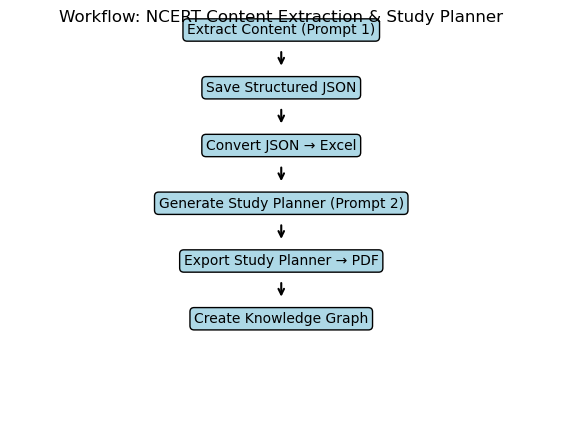

✅ Workflow Flowchart saved as workflow_flowchart.png


In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
ax.axis("off")

# Flowchart boxes
steps = [
    "Extract Content (Prompt 1)",
    "Save Structured JSON",
    "Convert JSON → Excel",
    "Generate Study Planner (Prompt 2)",
    "Export Study Planner → PDF",
    "Create Knowledge Graph"
]

# Plot flow
y = 1.0
for i, step in enumerate(steps):
    ax.text(0.5, y, step, ha="center", va="center", fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", edgecolor="black"))
    if i < len(steps) - 1:
        ax.annotate("", xy=(0.5, y - 0.1), xytext=(0.5, y - 0.05),
                    arrowprops=dict(arrowstyle="->", lw=1.5))
    y -= 0.15

plt.title("Workflow: NCERT Content Extraction & Study Planner", fontsize=12)
plt.savefig("workflow_flowchart.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Workflow Flowchart saved as workflow_flowchart.png")


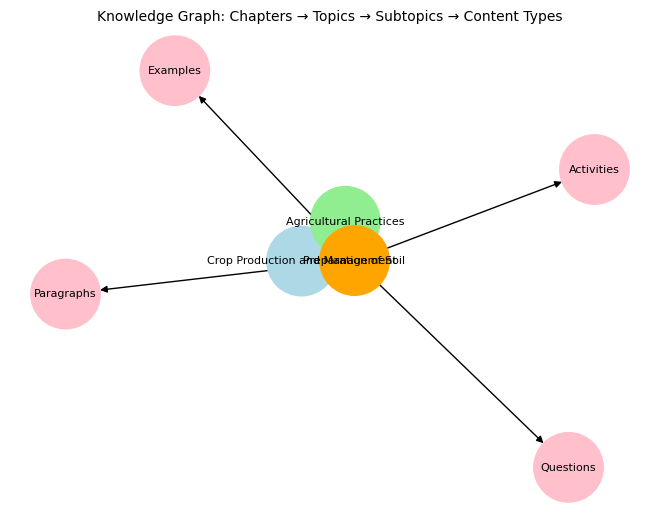

✅ Detailed Knowledge Graph saved as knowledge_graph_detailed.png


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for ch in data["Chapters"]:
    G.add_node(ch["chapter_name"], color="lightblue")
    for t in ch["topics"]:
        G.add_edge(ch["chapter_name"], t["topic_name"])
        for s in t["subtopics"]:
            G.add_edge(t["topic_name"], s["subtopic_name"])
            for ctype, contents in s["content"].items():
                if contents:
                    G.add_edge(s["subtopic_name"], ctype.capitalize())

# Draw graph
pos = nx.spring_layout(G, seed=42)
colors = ["lightblue" if n in [c["chapter_name"] for c in data["Chapters"]] 
          else "lightgreen" if n in [t["topic_name"] for ch in data["Chapters"] for t in ch["topics"]] 
          else "orange" if n in [s["subtopic_name"] for ch in data["Chapters"] for t in ch["topics"] for s in t["subtopics"]] 
          else "pink" for n in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2500, font_size=8, arrows=True)
plt.title("Knowledge Graph: Chapters → Topics → Subtopics → Content Types", fontsize=10)
plt.savefig("knowledge_graph_detailed.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Detailed Knowledge Graph saved as knowledge_graph_detailed.png")
